# Model Dependency Graph

Trying to provide a clear roadmap of how all the classes call each other. Right now I just have the population module done.

DAG constructed using GraphViz.

In [132]:
from graphviz import Digraph
dag = Digraph('Main', node_attr={'shape': 'oval'})

dag.node('M', 'Main()')
dag.node('Mo', 'Model()')
dag.edge('Mo', 'M')

# larger classes
with dag.subgraph(name='model') as c:
    c.node('P', 'Population()')
    c.node('C', 'Consumption()')
    c.edge('P', 'Mo', label='attr_pd_df')
    c.edges([('P', 'Mo'), ('C', 'Mo')])
    c.edge('P', 'C', label='  attr_pd_df and/or map  ')
    
# population_oes subclasses
with dag.subgraph(name='oes') as c:
    c.node('po', 'PopulationOES()')
    c.node('o', 'oes.yaml')
    c.node('i', 'data/ingestion')
    c.edge('o', 'po', label=' oes data & map')
    c.edges([('i', 'o')])
    c.edge('po', 'P', label='attr_pd_df & map')

# population_dict subclasses
with dag.subgraph(name='dict') as c:
    c.node('pd', 'PopulationDict()')
    c.node('dy', 'data.yaml')
    c.node('lb', 'model.yaml')
    c.node('dsc', 'description.yaml')
    c.edges([('dsc', 'pd'), ('lb', 'pd'), ('dy', 'pd')])
    c.edge('pd', 'P', label='attr_pd_df')


The current dependency map for the population module looks like this:

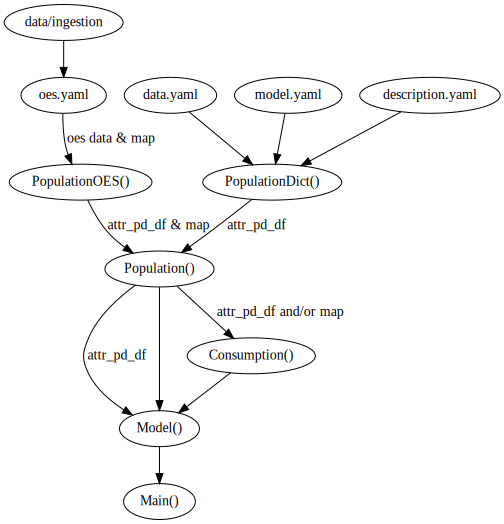

In [133]:
display(dag)

The biggest problem is that the `PopulationOES` class needs to dynamically generate the mapping between population protection levels on its own (and thus outputs a map), while the `PopulationDict` class does not need to do this and thus just outputs `attr_pd_df`. This should all be handled by `Consumption`.